## ReLU Regression Interactive

In [ ]:
import numpy as np
np.set_printoptions(precision=3)
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Task

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`. We'll have a few possible datasets.

In [ ]:
DATASET = 'temps'

if DATASET == 'toy':
    x = np.array([0, 1, 2, 3])[:, np.newaxis]
    y_true = np.array([-1, .5, 2.0, 3.5])[:, np.newaxis]
if DATASET == 'toy2':
    x = np.array([0, 1, 2, 3])[:, np.newaxis]
    y_true = np.array([-1, .5, 2.0, 25])[:, np.newaxis]
elif DATASET == "temps":
    data = pd.read_csv("https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv", skiprows=1)
    # Shape x to be items-by-features
    x = data.iloc[:, 0].values.astype(np.float32)[:, np.newaxis]
    # scale x to a reasonable range
    x -= 1880.0
    x /= 100.
    y_true = data.iloc[:, 1].values.astype(np.float32)[:, np.newaxis]


(145, 1) (145, 1)


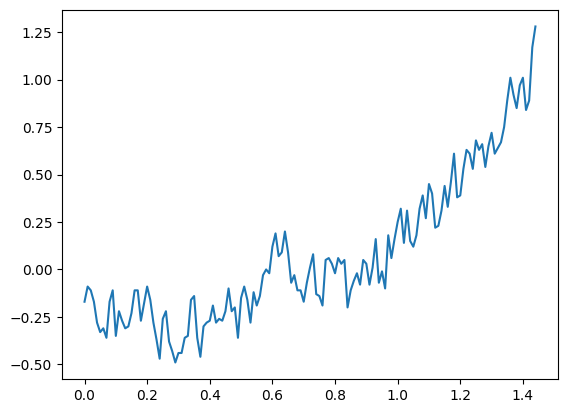

In [ ]:
if len(x) < 50:
    plt.scatter(x, y_true)
else:
    plt.plot(x, y_true)
print(x.shape, y_true.shape)

The following cell creates some features that we'll need later. Note that this is hardcoding a linear layer with ReLU activations.

After you have explored the potential of the ReLU regression, try switching `activation` to None, re-running all cells, and trying to fit the same data. What does this say about the importance of activation functions in neural networks?

Features shape: (1, 3)


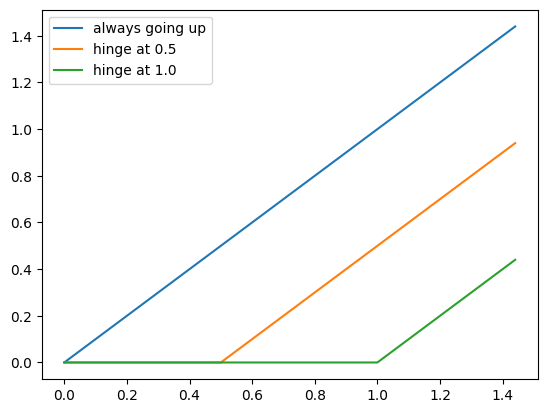

In [ ]:
# @title Creating Features {"run":"auto"}
activation = 'relu' #@param ["relu", "linear"]

# a simple hardcoded linear layer
pretend_first_layer_weights = np.array([[1.0, 1.0, 1.0]])
pretend_first_layer_bias = np.array([0.0, -0.5, -1.0])
pretend_first_layer_out = x @ pretend_first_layer_weights + pretend_first_layer_bias

if activation == 'relu':
    # a rectifier
    pretend_first_layer_activations = np.maximum(pretend_first_layer_out, 0.0)
else:
    pretend_first_layer_activations = pretend_first_layer_out
f1, f2, f3 = pretend_first_layer_activations.T
print("Features shape:", pretend_first_layer_weights.shape)

plt.close('all')
with plt.ioff(): # needed to avoid duplicate plots in notebooks
    fig = plt.figure()
plt.plot(x, f1, label="always going up")
plt.plot(x, f2, label="hinge at 0.5")
plt.plot(x, f3, label="hinge at 1.0")
plt.legend()
display(fig)

Why might that help us? Well, we can mix them together. **Try adjusting the mixing weights to fit the data.** You'll also need to adjust the bias. You should be able to get MSE to be belowe 0.02.

In [ ]:
with plt.ioff(): # needed to avoid duplicate plots in notebooks
    fig = plt.figure()

r = 2.0
@widgets.interact(w1=(-r, r), w2=(-r, r), w3=(-r, r), bias=(-1.0, 1.0))
def plot_linreg(w1=.1, w2=0.0, w3 = 0.0, bias=0.0):
    y_pred = w1 * f1 + w2 * f2 + w3 * f3 + bias
    plt.cla()
    plt.scatter(x, y_true)
    plt.plot(x, y_pred, 'r')

    resid = y_true - y_pred[:, np.newaxis]
    mse = (resid ** 2).mean()
    mae = np.abs(resid).mean()
    plt.title(f"MSE: {mse:.3f}, MAE: {mae:.3f}")
    display(fig)

interactive(children=(FloatSlider(value=0.1, description='w1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

Now that you've found a good fit, try changing:

1. The activation function (e.g., `activation = None`)
2. The biases of the pretend hidden layer

What do you notice about the kind of functions that you can fit with this architecture?